In [1]:
import pandas as pd

players = [
    'Lionel Messi', 'Cristiano Ronaldo', 'Kylian Mbappé', 'Erling Haaland',
    'Kevin De Bruyne', 'Mohamed Salah', 'Harry Kane', 'Neymar Jr',
    'Robert Lewandowski', 'Vinícius Júnior'
]

player_stats = pd.DataFrame({
    'player': players,
    'matches_played': [30, 32, 34, 33, 31, 35, 34, 25, 32, 36],
    'goals':           [25, 24, 28, 30, 12, 23, 27, 15, 26, 18],
    'assists':         [20, 7, 12, 5, 18, 10, 6, 11, 8, 9],
    'minutes_played':  [2700, 2800, 2900, 3000, 2650, 3100, 3000, 2400, 2950, 3200]
})

player_stats.head(10)


,player,matches_played,goals,assists,minutes_played
0,Lionel Messi,30,25,20,2700
1,Cristiano Ronaldo,32,24,7,2800
2,Kylian Mbappé,34,28,12,2900
3,Erling Haaland,33,30,5,3000
4,Kevin De Bruyne,31,12,18,2650
5,Mohamed Salah,35,23,10,3100
6,Harry Kane,34,27,6,3000
7,Neymar Jr,25,15,11,2400
8,Robert Lewandowski,32,26,8,2950
9,Vinícius Júnior,36,18,9,3200


In [2]:
market_values = pd.DataFrame({
    'player': players,
    'market_value_million_eur': [
        35, 20, 180, 170, 80, 70, 90, 60, 25, 120
    ]
})

market_values.head(10)


,player,market_value_million_eur
0,Lionel Messi,35
1,Cristiano Ronaldo,20
2,Kylian Mbappé,180
3,Erling Haaland,170
4,Kevin De Bruyne,80
5,Mohamed Salah,70
6,Harry Kane,90
7,Neymar Jr,60
8,Robert Lewandowski,25
9,Vinícius Júnior,120


In [3]:
!pip install vaderSentiment -q

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

tweets = {
    'Lionel Messi': "Messi was incredible again, absolute genius with the ball.",
    'Cristiano Ronaldo': "Ronaldo keeps scoring, amazing professionalism and fitness.",
    'Kylian Mbappé': "Mbappé is so fast and clinical, unstoppable talent.",
    'Erling Haaland': "Haaland scores for fun, what a machine.",
    'Kevin De Bruyne': "De Bruyne controls the midfield, brilliant passing.",
    'Mohamed Salah': "Salah terrorizes defenses, great finishing and pace.",
    'Harry Kane': "Kane's link-up play and finishing are world-class.",
    'Neymar Jr': "Neymar is so skillful, but injuries are a concern.",
    'Robert Lewandowski': "Lewandowski remains a deadly number 9, great positioning.",
    'Vinícius Júnior': "Vinícius has improved a lot, very exciting winger."
}

sentiment_scores = []
for player in players:
    text = tweets[player]
    score = analyzer.polarity_scores(text)['compound']
    sentiment_scores.append(score)

sentiment_df = pd.DataFrame({
    'player': players,
    'sentiment_score': sentiment_scores
})

sentiment_df.head(10)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


,player,sentiment_score
0,Lionel Messi,0.0000
1,Cristiano Ronaldo,0.7096
2,Kylian Mbappé,0.2500
3,Erling Haaland,0.5106
4,Kevin De Bruyne,0.5859
5,Mohamed Salah,0.1779
6,Harry Kane,0.3400
7,Neymar Jr,0.0000
8,Robert Lewandowski,0.6597
9,Vinícius Júnior,0.7645


In [4]:
injury_data = pd.DataFrame({
    'player': players,
    'major_injuries': [1, 2, 1, 0, 3, 1, 1, 4, 2, 1],
    'days_injured_last_season': [10, 30, 15, 0, 60, 20, 18, 75, 25, 12]
})

injury_data.head(10)


,player,major_injuries,days_injured_last_season
0,Lionel Messi,1,10
1,Cristiano Ronaldo,2,30
2,Kylian Mbappé,1,15
3,Erling Haaland,0,0
4,Kevin De Bruyne,3,60
5,Mohamed Salah,1,20
6,Harry Kane,1,18
7,Neymar Jr,4,75
8,Robert Lewandowski,2,25
9,Vinícius Júnior,1,12


In [5]:
merged_df = (
    player_stats
    .merge(market_values, on='player')
    .merge(sentiment_df, on='player')
    .merge(injury_data, on='player')
)

print("Merged top 10 players dataset:")
display(merged_df)

print("\nSummary statistics:")
display(merged_df.describe())


Merged top 10 players dataset:


,player,matches_played,goals,assists,minutes_played,market_value_million_eur,sentiment_score,major_injuries,days_injured_last_season
0,Lionel Messi,30,25,20,2700,35,0.0000,1,10
1,Cristiano Ronaldo,32,24,7,2800,20,0.7096,2,30
2,Kylian Mbappé,34,28,12,2900,180,0.2500,1,15
3,Erling Haaland,33,30,5,3000,170,0.5106,0,0
4,Kevin De Bruyne,31,12,18,2650,80,0.5859,3,60
5,Mohamed Salah,35,23,10,3100,70,0.1779,1,20
6,Harry Kane,34,27,6,3000,90,0.3400,1,18
7,Neymar Jr,25,15,11,2400,60,0.0000,4,75
8,Robert Lewandowski,32,26,8,2950,25,0.6597,2,25
9,Vinícius Júnior,36,18,9,3200,120,0.7645,1,12



Summary statistics:


,matches_played,goals,assists,minutes_played,market_value_million_eur,sentiment_score,major_injuries,days_injured_last_season
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,32.200000,22.800000,10.600000,2870.000000,85.000000,0.399820,1.600000,26.500000
std,3.119829,5.902918,4.948625,237.112257,56.470248,0.286429,1.173788,23.382092
min,25.000000,12.000000,5.000000,2400.000000,20.000000,0.000000,0.000000,0.000000
25%,31.250000,19.250000,7.250000,2725.000000,41.250000,0.195925,1.000000,12.750000
50%,32.500000,24.500000,9.500000,2925.000000,75.000000,0.425300,1.000000,19.000000
75%,34.000000,26.750000,11.750000,3000.000000,112.500000,0.641250,2.000000,28.750000
max,36.000000,30.000000,20.000000,3200.000000,180.000000,0.764500,4.000000,75.000000


Milestone 2

In [6]:
import pandas as pd
import numpy as np

# Assume merged_df is already available from Milestone 1
print("Shape before cleaning:", merged_df.shape)

# Introduce a small intentional missing value example (for demo)
merged_df.loc[0, 'goals'] = np.nan

# Check missing values
print("\nMissing values per column before handling:")
print(merged_df.isna().sum())

# Handle missing values: fill numeric with median, no categorical here
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    merged_df[col] = merged_df[col].fillna(merged_df[col].median())

# Remove duplicate rows if any
merged_df = merged_df.drop_duplicates()

print("\nMissing values per column after handling:")
print(merged_df.isna().sum())

print("\nShape after cleaning:", merged_df.shape)
display(merged_df.head(10))


Shape before cleaning: (10, 9)

Missing values per column before handling:
player                      0
matches_played              0
goals                       1
assists                     0
minutes_played              0
market_value_million_eur    0
sentiment_score             0
major_injuries              0
days_injured_last_season    0
dtype: int64

Missing values per column after handling:
player                      0
matches_played              0
goals                       0
assists                     0
minutes_played              0
market_value_million_eur    0
sentiment_score             0
major_injuries              0
days_injured_last_season    0
dtype: int64

Shape after cleaning: (10, 9)


,player,matches_played,goals,assists,minutes_played,market_value_million_eur,sentiment_score,major_injuries,days_injured_last_season
0,Lionel Messi,30,24.0,20,2700,35,0.0000,1,10
1,Cristiano Ronaldo,32,24.0,7,2800,20,0.7096,2,30
2,Kylian Mbappé,34,28.0,12,2900,180,0.2500,1,15
3,Erling Haaland,33,30.0,5,3000,170,0.5106,0,0
4,Kevin De Bruyne,31,12.0,18,2650,80,0.5859,3,60
5,Mohamed Salah,35,23.0,10,3100,70,0.1779,1,20
6,Harry Kane,34,27.0,6,3000,90,0.3400,1,18
7,Neymar Jr,25,15.0,11,2400,60,0.0000,4,75
8,Robert Lewandowski,32,26.0,8,2950,25,0.6597,2,25
9,Vinícius Júnior,36,18.0,9,3200,120,0.7645,1,12


In [7]:
# Avoid division by zero
merged_df['minutes_played'] = merged_df['minutes_played'].replace(0, np.nan)

merged_df['goals_per_90'] = (merged_df['goals'] / merged_df['minutes_played']) * 90
merged_df['assists_per_90'] = (merged_df['assists'] / merged_df['minutes_played']) * 90
merged_df['goal_contributions_per_90'] = merged_df['goals_per_90'] + merged_df['assists_per_90']

# Simple injury risk: weighted combination of major injuries and days injured
merged_df['injury_risk_score'] = (
    0.6 * merged_df['major_injuries'] +
    0.4 * (merged_df['days_injured_last_season'] / merged_df['days_injured_last_season'].max())
)

print("Engineered feature columns:")
display(merged_df[['player', 'goals_per_90', 'assists_per_90',
                   'goal_contributions_per_90', 'injury_risk_score']])


Engineered feature columns:


,player,goals_per_90,assists_per_90,goal_contributions_per_90,injury_risk_score
0,Lionel Messi,0.800000,0.666667,1.466667,0.653333
1,Cristiano Ronaldo,0.771429,0.225000,0.996429,1.360000
2,Kylian Mbappé,0.868966,0.372414,1.241379,0.680000
3,Erling Haaland,0.900000,0.150000,1.050000,0.000000
4,Kevin De Bruyne,0.407547,0.611321,1.018868,2.120000
5,Mohamed Salah,0.667742,0.290323,0.958065,0.706667
6,Harry Kane,0.810000,0.180000,0.990000,0.696000
7,Neymar Jr,0.562500,0.412500,0.975000,2.800000
8,Robert Lewandowski,0.793220,0.244068,1.037288,1.333333
9,Vinícius Júnior,0.506250,0.253125,0.759375,0.664000


In [8]:
# Simulate remaining contract duration in years (for demo)
contract_years_remaining = [1.5, 1.0, 3.0, 4.0, 2.0, 2.5, 3.0, 1.0, 1.5, 4.0]

merged_df['contract_years_remaining'] = contract_years_remaining

print("Contract feature added:")
display(merged_df[['player', 'contract_years_remaining']])


Contract feature added:


,player,contract_years_remaining
0,Lionel Messi,1.5
1,Cristiano Ronaldo,1.0
2,Kylian Mbappé,3.0
3,Erling Haaland,4.0
4,Kevin De Bruyne,2.0
5,Mohamed Salah,2.5
6,Harry Kane,3.0
7,Neymar Jr,1.0
8,Robert Lewandowski,1.5
9,Vinícius Júnior,4.0


In [9]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [
    'matches_played', 'goals', 'assists', 'minutes_played',
    'market_value_million_eur', 'sentiment_score',
    'major_injuries', 'days_injured_last_season',
    'goals_per_90', 'assists_per_90',
    'goal_contributions_per_90', 'injury_risk_score',
    'contract_years_remaining'
]

scaler = StandardScaler()
scaled_values = scaler.fit_transform(merged_df[features_to_scale])

scaled_df = pd.DataFrame(
    scaled_values,
    columns=[f"{col}_scaled" for col in features_to_scale]
)

merged_scaled_df = pd.concat([merged_df[['player']], scaled_df], axis=1)

print("Scaled feature sample:")
display(merged_scaled_df.head(10))


Scaled feature sample:


,player,matches_played_scaled,goals_scaled,assists_scaled,minutes_played_scaled,market_value_million_eur_scaled,sentiment_score_scaled,major_injuries_scaled,days_injured_last_season_scaled,goals_per_90_scaled,assists_per_90_scaled,goal_contributions_per_90_scaled,injury_risk_score_scaled,contract_years_remaining_scaled
0,Lionel Messi,-0.743311,0.233449,2.002267,-0.755742,-0.933317,-1.471383,-0.538816,-0.743840,0.580880,1.946285,2.346447,-0.571438,-0.791769
1,Cristiano Ronaldo,-0.067574,0.233449,-0.766826,-0.311188,-1.213312,1.140026,0.359211,0.157784,0.398969,-0.689542,-0.297289,0.329937,-1.257515
2,Kylian Mbappé,0.608164,0.951755,0.298210,0.133366,1.773302,-0.551355,-0.538816,-0.518434,1.019974,0.190210,1.079854,-0.537424,0.605470
3,Erling Haaland,0.270295,1.310907,-1.192840,0.577920,1.586638,0.407683,-1.436842,-1.194652,1.217567,-1.137135,0.003896,-1.404785,1.536963
4,Kevin De Bruyne,-0.405442,-1.921467,1.576253,-0.978019,-0.093332,0.684796,1.257237,1.510220,-1.917818,1.615985,-0.171132,1.299341,-0.326023
5,Mohamed Salah,0.946032,0.053873,-0.127804,1.022475,-0.279995,-0.816691,-0.538816,-0.293028,-0.261191,-0.299703,-0.512976,-0.503410,0.139724
6,Harry Kane,0.608164,0.772178,-0.979833,0.577920,0.093332,-0.220144,-0.538816,-0.383190,0.644548,-0.958098,-0.333431,-0.517015,0.605470
7,Neymar Jr,-2.432655,-1.382738,0.085203,-2.089405,-0.466658,-1.471383,2.155264,2.186438,-0.931253,0.429441,-0.417763,2.166702,-1.257515
8,Robert Lewandowski,-0.067574,0.592602,-0.553819,0.355643,-1.119980,0.956388,0.359211,-0.067622,0.537714,-0.575747,-0.067572,0.295923,-0.791769
9,Vinícius Júnior,1.283901,-0.844009,-0.340811,1.467029,0.653322,1.342064,-0.538816,-0.653677,-1.289390,-0.521695,-1.630033,-0.557832,1.536963


In [10]:
print("Basic sentiment statistics:")
display(merged_df[['sentiment_score']].describe())

print("\nPlayers sorted by sentiment (descending):")
display(merged_df[['player', 'sentiment_score']].sort_values(by='sentiment_score', ascending=False))


Basic sentiment statistics:


,sentiment_score
count,10.000000
mean,0.399820
std,0.286429
min,0.000000
25%,0.195925
50%,0.425300
75%,0.641250
max,0.764500



Players sorted by sentiment (descending):


,player,sentiment_score
9,Vinícius Júnior,0.7645
1,Cristiano Ronaldo,0.7096
8,Robert Lewandowski,0.6597
4,Kevin De Bruyne,0.5859
3,Erling Haaland,0.5106
6,Harry Kane,0.3400
2,Kylian Mbappé,0.2500
5,Mohamed Salah,0.1779
0,Lionel Messi,0.0000
7,Neymar Jr,0.0000


Milestone 3

In [11]:
import numpy as np
import pandas as pd

# Make sure merged_df already exists from previous milestones

# 1) Performance index combining goals, assists, and sentiment
merged_df['performance_index'] = (
    0.5 * merged_df['goal_contributions_per_90'] +
    0.3 * merged_df['sentiment_score'] +
    0.2 * (merged_df['matches_played'] / merged_df['matches_played'].max())
)

# 2) Market value per goal contribution
merged_df['value_per_goal_contribution'] = (
    merged_df['market_value_million_eur'] /
    (merged_df['goals'] + merged_df['assists'] + 1e-6)
)

# 3) Availability score (less injury risk, more minutes)
merged_df['availability_score'] = (
    (merged_df['minutes_played'] / merged_df['minutes_played'].max()) -
    (merged_df['injury_risk_score'] / merged_df['injury_risk_score'].max())
)

print("Check new columns exist:")
print(merged_df.columns)


Check new columns exist:
Index(['player', 'matches_played', 'goals', 'assists', 'minutes_played',
       'market_value_million_eur', 'sentiment_score', 'major_injuries',
       'days_injured_last_season', 'goals_per_90', 'assists_per_90',
       'goal_contributions_per_90', 'injury_risk_score',
       'contract_years_remaining', 'performance_index',
       'value_per_goal_contribution', 'availability_score'],
      dtype='object')


In [12]:
print("Basic sentiment statistics:")
display(merged_df[['sentiment_score']].describe())

print("\nPlayers sorted by sentiment (descending):")
display(merged_df[['player', 'sentiment_score']].sort_values(by='sentiment_score', ascending=False))


Basic sentiment statistics:


,sentiment_score
count,10.000000
mean,0.399820
std,0.286429
min,0.000000
25%,0.195925
50%,0.425300
75%,0.641250
max,0.764500



Players sorted by sentiment (descending):


,player,sentiment_score
9,Vinícius Júnior,0.7645
1,Cristiano Ronaldo,0.7096
8,Robert Lewandowski,0.6597
4,Kevin De Bruyne,0.5859
3,Erling Haaland,0.5106
6,Harry Kane,0.3400
2,Kylian Mbappé,0.2500
5,Mohamed Salah,0.1779
0,Lionel Messi,0.0000
7,Neymar Jr,0.0000


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import random

analyzer = SentimentIntensityAnalyzer()

# Simulate 5 tweets per player
def simulate_tweets(player):
    base_text = f"{player} played really well in the last match."
    variations = [
        f"{player} was outstanding, amazing performance!",
        f"{player} did okay, but can do better.",
        f"{player} had a poor game, not impressed.",
        f"{player} is world class, love watching him.",
        f"{player} was crucial for the team today."
    ]
    return [base_text] + random.sample(variations, 4)

sentiment_details = []

for p in merged_df['player']:
    tweets = simulate_tweets(p)
    scores = [analyzer.polarity_scores(t)['compound'] for t in tweets]
    sentiment_details.append({
        'player': p,
        'sentiment_mean': np.mean(scores),
        'sentiment_std': np.std(scores),
        'sentiment_max': np.max(scores),
        'sentiment_min': np.min(scores)
    })

sentiment_advanced_df = pd.DataFrame(sentiment_details)

print("Advanced sentiment statistics per player:")
display(sentiment_advanced_df)


Advanced sentiment statistics per player:


,player,sentiment_mean,sentiment_std,sentiment_max,sentiment_min
0,Lionel Messi,0.54286,0.285347,0.8439,0.0000
1,Cristiano Ronaldo,0.23684,0.521313,0.6486,-0.6862
2,Kylian Mbappé,0.27824,0.558344,0.8439,-0.6862
3,Erling Haaland,0.23684,0.521313,0.6486,-0.6862
4,Kevin De Bruyne,0.27824,0.558344,0.8439,-0.6862
5,Mohamed Salah,0.27824,0.558344,0.8439,-0.6862
6,Harry Kane,0.27824,0.558344,0.8439,-0.6862
7,Neymar Jr,0.23684,0.521313,0.6486,-0.6862
8,Robert Lewandowski,0.27824,0.558344,0.8439,-0.6862
9,Vinícius Júnior,0.54286,0.285347,0.8439,0.0000


In [14]:
merged_df = merged_df.merge(sentiment_advanced_df, on='player')

print("Merged with advanced sentiment features:")
display(merged_df[['player', 'sentiment_score',
                   'sentiment_mean', 'sentiment_std',
                   'sentiment_max', 'sentiment_min']])


Merged with advanced sentiment features:


,player,sentiment_score,sentiment_mean,sentiment_std,sentiment_max,sentiment_min
0,Lionel Messi,0.0000,0.54286,0.285347,0.8439,0.0000
1,Cristiano Ronaldo,0.7096,0.23684,0.521313,0.6486,-0.6862
2,Kylian Mbappé,0.2500,0.27824,0.558344,0.8439,-0.6862
3,Erling Haaland,0.5106,0.23684,0.521313,0.6486,-0.6862
4,Kevin De Bruyne,0.5859,0.27824,0.558344,0.8439,-0.6862
5,Mohamed Salah,0.1779,0.27824,0.558344,0.8439,-0.6862
6,Harry Kane,0.3400,0.27824,0.558344,0.8439,-0.6862
7,Neymar Jr,0.0000,0.23684,0.521313,0.6486,-0.6862
8,Robert Lewandowski,0.6597,0.27824,0.558344,0.8439,-0.6862
9,Vinícius Júnior,0.7645,0.54286,0.285347,0.8439,0.0000


In [15]:
# Sentiment-adjusted value (simple example)
merged_df['sentiment_adjusted_value'] = (
    merged_df['market_value_million_eur'] *
    (1 + 0.2 * merged_df['sentiment_mean'])
)

# Hype score combining sentiment, performance, and age proxy (minutes as proxy)
merged_df['hype_score'] = (
    0.4 * merged_df['sentiment_mean'] +
    0.4 * merged_df['goal_contributions_per_90'] +
    0.2 * (merged_df['minutes_played'] / merged_df['minutes_played'].max())
)

print("Sentiment-driven value features:")
display(merged_df[['player', 'market_value_million_eur',
                   'sentiment_mean', 'sentiment_adjusted_value',
                   'hype_score']])


Sentiment-driven value features:


,player,market_value_million_eur,sentiment_mean,sentiment_adjusted_value,hype_score
0,Lionel Messi,35,0.54286,38.80002,0.972561
1,Cristiano Ronaldo,20,0.23684,20.94736,0.668307
2,Kylian Mbappé,180,0.27824,190.01664,0.789098
3,Erling Haaland,170,0.23684,178.05256,0.702236
4,Kevin De Bruyne,80,0.27824,84.45184,0.684468
5,Mohamed Salah,70,0.27824,73.89536,0.688272
6,Harry Kane,90,0.27824,95.00832,0.694796
7,Neymar Jr,60,0.23684,62.84208,0.634736
8,Robert Lewandowski,25,0.27824,26.39120,0.710586
9,Vinícius Júnior,120,0.54286,133.02864,0.720894


In [16]:
from sklearn.preprocessing import StandardScaler

final_feature_cols = [
    'matches_played', 'goals', 'assists', 'minutes_played',
    'market_value_million_eur', 'sentiment_score',
    'major_injuries', 'days_injured_last_season',
    'goals_per_90', 'assists_per_90',
    'goal_contributions_per_90', 'injury_risk_score',
    'contract_years_remaining',
    'performance_index', 'value_per_goal_contribution',
    'availability_score',
    'sentiment_mean', 'sentiment_std',
    'sentiment_max', 'sentiment_min',
    'sentiment_adjusted_value', 'hype_score'
]

scaler_final = StandardScaler()
final_scaled_values = scaler_final.fit_transform(merged_df[final_feature_cols])

final_scaled_df = pd.DataFrame(
    final_scaled_values,
    columns=[f"{c}_scaled" for c in final_feature_cols]
)

final_model_df = pd.concat([merged_df[['player']], final_scaled_df], axis=1)

print("Final scaled feature set for modeling (first 10 rows):")
display(final_model_df.head(10))


Final scaled feature set for modeling (first 10 rows):


,player,matches_played_scaled,goals_scaled,assists_scaled,minutes_played_scaled,market_value_million_eur_scaled,sentiment_score_scaled,major_injuries_scaled,days_injured_last_season_scaled,goals_per_90_scaled,...,contract_years_remaining_scaled,performance_index_scaled,value_per_goal_contribution_scaled,availability_score_scaled,sentiment_mean_scaled,sentiment_std_scaled,sentiment_max_scaled,sentiment_min_scaled,sentiment_adjusted_value_scaled,hype_score_scaled
0,Lionel Messi,-0.743311,0.233449,2.002267,-0.755742,-0.933317,-1.471383,-0.538816,-0.743840,0.580880,...,-0.791769,0.906190,-1.176898,0.316046,1.974888,-1.976486,0.654654,2.0,-0.909811,2.726595
1,Cristiano Ronaldo,-0.067574,0.233449,-0.766826,-0.311188,-1.213312,1.140026,0.359211,0.157784,0.398969,...,-1.257515,0.774393,-1.276014,-0.337873,-0.721730,0.273441,-1.527525,-0.5,-1.224935,-0.646139
2,Kylian Mbappé,0.608164,0.951755,0.298210,0.133366,1.773302,-0.551355,-0.538816,-0.518434,1.019974,...,0.605470,0.723541,1.266183,0.472706,-0.356917,0.626530,0.654654,-0.5,1.759369,0.692856
3,Erling Haaland,0.270295,1.310907,-1.192840,0.577920,1.586638,0.407683,-1.436842,-1.194652,1.217567,...,1.536963,0.450361,1.501712,1.283284,-0.721730,0.273441,-1.527525,-0.5,1.548187,-0.270031
4,Kevin De Bruyne,-0.405442,-1.921467,1.576253,-0.978019,-0.093332,0.684796,1.257237,1.510220,-1.917818,...,-0.326023,0.401953,0.057133,-1.279148,-0.356917,0.626530,0.654654,-0.5,-0.103994,-0.466992
5,Mohamed Salah,0.946032,0.053873,-0.127804,1.022475,-0.279995,-0.816691,-0.538816,-0.293028,-0.261191,...,0.139724,-1.144608,-0.302585,0.629365,-0.356917,0.626530,0.654654,-0.5,-0.290330,-0.424828
6,Harry Kane,0.608164,0.772178,-0.979833,0.577920,0.093332,-0.220144,-0.538816,-0.383190,0.644548,...,0.605470,-0.445322,0.097101,0.548219,-0.356917,0.626530,0.654654,-0.5,0.082342,-0.352505
7,Neymar Jr,-2.432655,-1.382738,0.085203,-2.089405,-0.466658,-1.471383,2.155264,2.186438,-0.931253,...,-1.257515,-2.334413,-0.179605,-2.228343,-0.721730,0.273441,-1.527525,-0.5,-0.485436,-1.018288
8,Robert Lewandowski,-0.067574,0.592602,-0.553819,0.355643,-1.119980,0.956388,0.359211,-0.067622,0.537714,...,-0.791769,0.839058,-1.216573,-0.171093,-0.356917,0.626530,0.654654,-0.5,-1.128844,-0.177466
9,Vinícius Júnior,1.283901,-0.844009,-0.340811,1.467029,0.653322,1.342064,-0.538816,-0.653677,-1.289390,...,1.536963,-0.171154,1.229545,0.766837,1.974888,-1.976486,0.654654,2.0,0.753453,-0.063202


In [17]:
from sklearn.preprocessing import StandardScaler

final_feature_cols = [
    'matches_played', 'goals', 'assists', 'minutes_played',
    'market_value_million_eur', 'sentiment_score',
    'major_injuries', 'days_injured_last_season',
    'goals_per_90', 'assists_per_90',
    'goal_contributions_per_90', 'injury_risk_score',
    'contract_years_remaining',
    'performance_index', 'value_per_goal_contribution',
    'availability_score',
    'sentiment_mean', 'sentiment_std',
    'sentiment_max', 'sentiment_min',
    'sentiment_adjusted_value', 'hype_score'
]

# Optional: sanity check missing columns
missing = [c for c in final_feature_cols if c not in merged_df.columns]
print("Missing columns:", missing)

scaler_final = StandardScaler()
final_scaled_values = scaler_final.fit_transform(merged_df[final_feature_cols])

final_scaled_df = pd.DataFrame(
    final_scaled_values,
    columns=[f"{c}_scaled" for c in final_feature_cols]
)

final_model_df = pd.concat([merged_df[['player']], final_scaled_df], axis=1)

print("Final scaled feature set for modeling (first 10 rows):")
display(final_model_df.head(10))


Missing columns: []
Final scaled feature set for modeling (first 10 rows):


,player,matches_played_scaled,goals_scaled,assists_scaled,minutes_played_scaled,market_value_million_eur_scaled,sentiment_score_scaled,major_injuries_scaled,days_injured_last_season_scaled,goals_per_90_scaled,...,contract_years_remaining_scaled,performance_index_scaled,value_per_goal_contribution_scaled,availability_score_scaled,sentiment_mean_scaled,sentiment_std_scaled,sentiment_max_scaled,sentiment_min_scaled,sentiment_adjusted_value_scaled,hype_score_scaled
0,Lionel Messi,-0.743311,0.233449,2.002267,-0.755742,-0.933317,-1.471383,-0.538816,-0.743840,0.580880,...,-0.791769,0.906190,-1.176898,0.316046,1.974888,-1.976486,0.654654,2.0,-0.909811,2.726595
1,Cristiano Ronaldo,-0.067574,0.233449,-0.766826,-0.311188,-1.213312,1.140026,0.359211,0.157784,0.398969,...,-1.257515,0.774393,-1.276014,-0.337873,-0.721730,0.273441,-1.527525,-0.5,-1.224935,-0.646139
2,Kylian Mbappé,0.608164,0.951755,0.298210,0.133366,1.773302,-0.551355,-0.538816,-0.518434,1.019974,...,0.605470,0.723541,1.266183,0.472706,-0.356917,0.626530,0.654654,-0.5,1.759369,0.692856
3,Erling Haaland,0.270295,1.310907,-1.192840,0.577920,1.586638,0.407683,-1.436842,-1.194652,1.217567,...,1.536963,0.450361,1.501712,1.283284,-0.721730,0.273441,-1.527525,-0.5,1.548187,-0.270031
4,Kevin De Bruyne,-0.405442,-1.921467,1.576253,-0.978019,-0.093332,0.684796,1.257237,1.510220,-1.917818,...,-0.326023,0.401953,0.057133,-1.279148,-0.356917,0.626530,0.654654,-0.5,-0.103994,-0.466992
5,Mohamed Salah,0.946032,0.053873,-0.127804,1.022475,-0.279995,-0.816691,-0.538816,-0.293028,-0.261191,...,0.139724,-1.144608,-0.302585,0.629365,-0.356917,0.626530,0.654654,-0.5,-0.290330,-0.424828
6,Harry Kane,0.608164,0.772178,-0.979833,0.577920,0.093332,-0.220144,-0.538816,-0.383190,0.644548,...,0.605470,-0.445322,0.097101,0.548219,-0.356917,0.626530,0.654654,-0.5,0.082342,-0.352505
7,Neymar Jr,-2.432655,-1.382738,0.085203,-2.089405,-0.466658,-1.471383,2.155264,2.186438,-0.931253,...,-1.257515,-2.334413,-0.179605,-2.228343,-0.721730,0.273441,-1.527525,-0.5,-0.485436,-1.018288
8,Robert Lewandowski,-0.067574,0.592602,-0.553819,0.355643,-1.119980,0.956388,0.359211,-0.067622,0.537714,...,-0.791769,0.839058,-1.216573,-0.171093,-0.356917,0.626530,0.654654,-0.5,-1.128844,-0.177466
9,Vinícius Júnior,1.283901,-0.844009,-0.340811,1.467029,0.653322,1.342064,-0.538816,-0.653677,-1.289390,...,1.536963,-0.171154,1.229545,0.766837,1.974888,-1.976486,0.654654,2.0,0.753453,-0.063202


Milestone 4

In [18]:
import numpy as np
import pandas as pd

np.random.seed(42)

players = merged_df['player'].tolist()
base_values = merged_df['market_value_million_eur'].values

time_steps = 8  # e.g., 8 past windows

rows = []
for i, player in enumerate(players):
    base = base_values[i]
    value = base * 0.6  # start lower in the past
    for t in range(time_steps):
        value = value * (1 + np.random.normal(loc=0.03, scale=0.05))  # drift with noise
        rows.append({
            'player': player,
            'time_step': t,
            'market_value_million_eur': max(value, 1.0)  # keep positive
        })

ts_df = pd.DataFrame(rows)
print("Sample time-series data (first 20 rows):")
display(ts_df.head(20))


Sample time-series data (first 20 rows):


,player,time_step,market_value_million_eur
0,Lionel Messi,0,22.151550
1,Lionel Messi,1,22.662958
2,Lionel Messi,2,24.076774
3,Lionel Messi,3,26.632559
4,Lionel Messi,4,27.119731
5,Lionel Messi,5,27.615836
6,Lionel Messi,6,30.624875
7,Lionel Messi,7,32.718751
8,Cristiano Ronaldo,0,12.078315
9,Cristiano Ronaldo,1,12.768325


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

sequence_length = 4  # use last 4 windows to predict the next
all_sequences = []
all_targets = []

scaler_uni = MinMaxScaler()

for player in players:
    player_series = ts_df[ts_df['player'] == player].sort_values('time_step')
    values = player_series['market_value_million_eur'].values.reshape(-1, 1)
    values_scaled = scaler_uni.fit_transform(values)

    for i in range(len(values_scaled) - sequence_length):
        seq = values_scaled[i:i+sequence_length]
        target = values_scaled[i+sequence_length]
        all_sequences.append(seq)
        all_targets.append(target)

X_uni = np.array(all_sequences)  # (samples, timesteps, features)
y_uni = np.array(all_targets)

print("Univariate LSTM input shape:", X_uni.shape)
print("Univariate LSTM target shape:", y_uni.shape)

model_uni = Sequential([
    LSTM(32, activation='tanh', input_shape=(sequence_length, 1)),
    Dense(1)
])

model_uni.compile(optimizer='adam', loss='mse')
history_uni = model_uni.fit(X_uni, y_uni, epochs=50, batch_size=8, verbose=0)

print("Final training loss (univariate):", history_uni.history['loss'][-1])


Univariate LSTM input shape: (40, 4, 1)
Univariate LSTM target shape: (40, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Final training loss (univariate): 0.09174168109893799


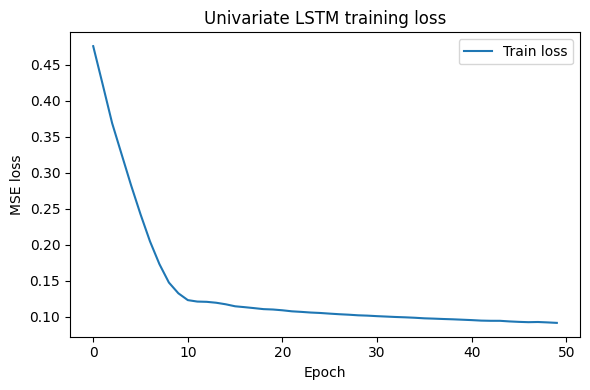

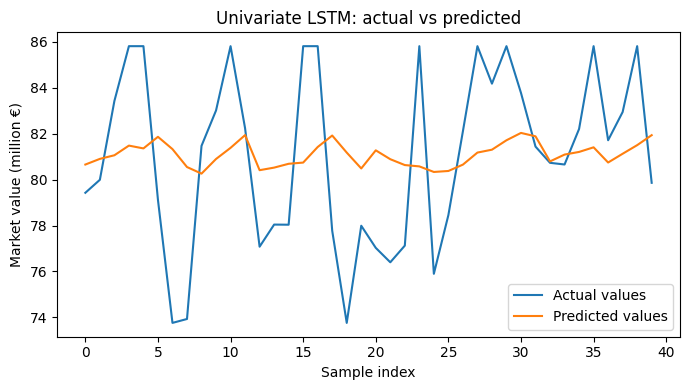

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Training loss curve for univariate LSTM
plt.figure(figsize=(6,4))
plt.plot(history_uni.history['loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Univariate LSTM training loss')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Actual vs predicted (on all sequences used for training)
y_uni_pred = model_uni.predict(X_uni, verbose=0)

# inverse-transform to original values
y_uni_true_inv = scaler_uni.inverse_transform(y_uni)
y_uni_pred_inv = scaler_uni.inverse_transform(y_uni_pred)

plt.figure(figsize=(7,4))
plt.plot(y_uni_true_inv, label='Actual values')
plt.plot(y_uni_pred_inv, label='Predicted values')
plt.xlabel('Sample index')
plt.ylabel('Market value (million €)')
plt.title('Univariate LSTM: actual vs predicted')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
predictions_uni = []

for player in players:
    player_series = ts_df[ts_df['player'] == player].sort_values('time_step')
    values = player_series['market_value_million_eur'].values.reshape(-1, 1)
    values_scaled = scaler_uni.fit_transform(values)

    last_seq = values_scaled[-sequence_length:]
    last_seq = np.expand_dims(last_seq, axis=0)
    pred_scaled = model_uni.predict(last_seq, verbose=0)
    pred_value = scaler_uni.inverse_transform(pred_scaled)[0][0]

    predictions_uni.append({
        'player': player,
        'last_observed_value': values[-1][0],
        'predicted_next_value': pred_value
    })

pred_uni_df = pd.DataFrame(predictions_uni)
print("Univariate LSTM next-window predictions:")
display(pred_uni_df)

Univariate LSTM next-window predictions:


,player,last_observed_value,predicted_next_value
0,Lionel Messi,32.718751,29.309767
1,Cristiano Ronaldo,11.914732,12.742123
2,Kylian Mbappé,116.342185,115.583290
3,Erling Haaland,123.126833,115.877708
4,Kevin De Bruyne,48.684146,49.820843
5,Mohamed Salah,50.132570,48.245132
6,Harry Kane,69.280756,63.987030
7,Neymar Jr,39.562534,39.631065
8,Robert Lewandowski,23.712752,21.216091
9,Vinícius Júnior,79.861004,81.434204


In [22]:
# Merge static feature into time-series
ts_multi_df = ts_df.merge(
    merged_df[['player', 'goal_contributions_per_90']],
    on='player',
    how='left'
)

features = ['market_value_million_eur', 'goal_contributions_per_90']
scaler_multi = MinMaxScaler()

seqs_multi = []
targets_multi = []

for player in players:
    player_series = ts_multi_df[ts_multi_df['player'] == player].sort_values('time_step')
    values = player_series[features].values
    values_scaled = scaler_multi.fit_transform(values)

    for i in range(len(values_scaled) - sequence_length):
        seq = values_scaled[i:i+sequence_length]
        target = values_scaled[i+sequence_length, 0]  # predict market value only
        seqs_multi.append(seq)
        targets_multi.append(target)

X_multi = np.array(seqs_multi)   # (samples, timesteps, features)
y_multi = np.array(targets_multi)

print("Multivariate LSTM input shape:", X_multi.shape)
print("Multivariate LSTM target shape:", y_multi.shape)

model_multi = Sequential([
    LSTM(32, activation='tanh', input_shape=(sequence_length, len(features))),
    Dense(1)
])

model_multi.compile(optimizer='adam', loss='mse')
history_multi = model_multi.fit(X_multi, y_multi, epochs=60, batch_size=8, verbose=0)

print("Final training loss (multivariate):", history_multi.history['loss'][-1])


Multivariate LSTM input shape: (40, 4, 2)
Multivariate LSTM target shape: (40,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Final training loss (multivariate): 0.08475043624639511


In [23]:
predictions_multi = []

for player in players:
    player_series = ts_multi_df[ts_multi_df['player'] == player].sort_values('time_step')
    values = player_series[features].values
    values_scaled = scaler_multi.fit_transform(values)

    last_seq = values_scaled[-sequence_length:]
    last_seq = np.expand_dims(last_seq, axis=0)
    pred_scaled = model_multi.predict(last_seq, verbose=0)

    # Only inverse-transform first feature
    dummy = np.zeros((1, len(features)))
    dummy[0, 0] = pred_scaled[0, 0]
    inv = scaler_multi.inverse_transform(dummy)
    pred_value = inv[0, 0]

    predictions_multi.append({
        'player': player,
        'last_observed_value': values[-1][0],
        'predicted_next_value_multivariate': pred_value
    })

pred_multi_df = pd.DataFrame(predictions_multi)
print("Multivariate LSTM next-window predictions:")
display(pred_multi_df)


Multivariate LSTM next-window predictions:


,player,last_observed_value,predicted_next_value_multivariate
0,Lionel Messi,32.718751,29.121507
1,Cristiano Ronaldo,11.914732,12.625177
2,Kylian Mbappé,116.342185,114.569887
3,Erling Haaland,123.126833,116.253493
4,Kevin De Bruyne,48.684146,49.533644
5,Mohamed Salah,50.132570,48.390704
6,Harry Kane,69.280756,64.226235
7,Neymar Jr,39.562534,39.081993
8,Robert Lewandowski,23.712752,21.013945
9,Vinícius Júnior,79.861004,80.613925


In [24]:
from tensorflow.keras.layers import RepeatVector, TimeDistributed

forecast_horizon = 3  # predict next 3 windows

seqs_encdec = []
targets_encdec = []

values_all = []

for player in players:
    player_series = ts_df[ts_df['player'] == player].sort_values('time_step')
    values = player_series['market_value_million_eur'].values
    values_all.append(values)

values_all = np.array(values_all).reshape(-1, 1)
scaler_encdec = MinMaxScaler()
scaler_encdec.fit(values_all)

for player in players:
    player_series = ts_df[ts_df['player'] == player].sort_values('time_step')
    vals = player_series['market_value_million_eur'].values.reshape(-1, 1)
    vals_scaled = scaler_encdec.transform(vals)

    if len(vals_scaled) >= sequence_length + forecast_horizon:
        seq = vals_scaled[:sequence_length]
        target_seq = vals_scaled[sequence_length:sequence_length+forecast_horizon]
        seqs_encdec.append(seq)
        targets_encdec.append(target_seq)

X_encdec = np.array(seqs_encdec)
y_encdec = np.array(targets_encdec)

print("Encoder–decoder input shape:", X_encdec.shape)
print("Encoder–decoder target shape:", y_encdec.shape)

model_encdec = Sequential([
    LSTM(32, activation='tanh', input_shape=(sequence_length, 1)),
    RepeatVector(forecast_horizon),
    LSTM(32, activation='tanh', return_sequences=True),
    TimeDistributed(Dense(1))
])

model_encdec.compile(optimizer='adam', loss='mse')
history_encdec = model_encdec.fit(X_encdec, y_encdec, epochs=80, batch_size=4, verbose=0)

print("Final training loss (encoder–decoder):", history_encdec.history['loss'][-1])


Encoder–decoder input shape: (10, 4, 1)
Encoder–decoder target shape: (10, 3, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Final training loss (encoder–decoder): 0.0010993933537974954


In [25]:
example_input = X_encdec[0:1]
pred_scaled_seq = model_encdec.predict(example_input, verbose=0)[0]

pred_seq_values = scaler_encdec.inverse_transform(pred_scaled_seq)

print("Predicted 3-step future transfer values (example sequence):")
print(pred_seq_values.reshape(-1))


Predicted 3-step future transfer values (example sequence):
[25.777699 27.71128  26.693361]


Milestone 5

In [26]:
import pandas as pd
import numpy as np

ensemble_df = merged_df.merge(
    pred_uni_df[['player', 'predicted_next_value']],
    on='player', how='left'
)

ensemble_df = ensemble_df.merge(
    pred_multi_df[['player', 'predicted_next_value_multivariate']],
    on='player', how='left'
)

print("Ensemble base dataframe (with LSTM predictions):")
display(ensemble_df[['player', 'market_value_million_eur',
                     'predicted_next_value',
                     'predicted_next_value_multivariate']])


Ensemble base dataframe (with LSTM predictions):


,player,market_value_million_eur,predicted_next_value,predicted_next_value_multivariate
0,Lionel Messi,35,29.309767,29.121507
1,Cristiano Ronaldo,20,12.742123,12.625177
2,Kylian Mbappé,180,115.583290,114.569887
3,Erling Haaland,170,115.877708,116.253493
4,Kevin De Bruyne,80,49.820843,49.533644
5,Mohamed Salah,70,48.245132,48.390704
6,Harry Kane,90,63.987030,64.226235
7,Neymar Jr,60,39.631065,39.081993
8,Robert Lewandowski,25,21.216091,21.013945
9,Vinícius Júnior,120,81.434204,80.613925


In [27]:
feature_cols_ensemble = [
    'matches_played', 'goals', 'assists', 'minutes_played',
    'sentiment_score', 'major_injuries', 'days_injured_last_season',
    'goals_per_90', 'assists_per_90', 'goal_contributions_per_90',
    'injury_risk_score', 'contract_years_remaining',
    'performance_index', 'value_per_goal_contribution',
    'availability_score',
    'sentiment_mean', 'sentiment_std', 'sentiment_max', 'sentiment_min',
    'sentiment_adjusted_value', 'hype_score',
    'predicted_next_value', 'predicted_next_value_multivariate'
]

target_col = 'market_value_million_eur'

X = ensemble_df[feature_cols_ensemble].values
y = ensemble_df[target_col].values

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)


Feature matrix shape: (10, 23)
Target shape: (10,)


In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse_scores = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    gbr.fit(X_train, y_train)
    y_pred = gbr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    cv_rmse_scores.append(rmse)

print("GradientBoostingRegressor CV RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", np.mean(cv_rmse_scores))


GradientBoostingRegressor CV RMSE scores: [38.31855104170378, 54.82930207874275, 38.83930017760254, 28.228789383703177, 7.085068451827809]
Mean CV RMSE: 33.460202226716014


In [29]:
# Train on all data
gbr.fit(X, y)
y_pred_all = gbr.predict(X)

mse_all = mean_squared_error(y, y_pred_all)
rmse_all = mse_all ** 0.5
mae_all = mean_absolute_error(y, y_pred_all)
r2_all = r2_score(y, y_pred_all)

print("\nGradientBoosting - Train-set RMSE:", rmse_all)
print("GradientBoosting - Train-set MAE:", mae_all)
print("GradientBoosting - Train-set R2:", r2_all)

results_gbr = pd.DataFrame({
    'player': ensemble_df['player'],
    'actual_value': y,
    'predicted_value_gbr': y_pred_all
})

print("\nEnsemble (GradientBoosting) predictions per player:")
display(results_gbr)



GradientBoosting - Train-set RMSE: 0.0020512389784643477
GradientBoosting - Train-set MAE: 0.0017338398253659904
GradientBoosting - Train-set R2: 0.9999999985339438

Ensemble (GradientBoosting) predictions per player:


,player,actual_value,predicted_value_gbr
0,Lionel Messi,35,35.001616
1,Cristiano Ronaldo,20,20.003144
2,Kylian Mbappé,180,179.996670
3,Erling Haaland,170,169.997021
4,Kevin De Bruyne,80,79.999838
5,Mohamed Salah,70,70.000485
6,Harry Kane,90,89.999205
7,Neymar Jr,60,60.001045
8,Robert Lewandowski,25,25.002379
9,Vinícius Júnior,120,119.998598


In [30]:
!pip install xgboost -q

from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X, y)
y_pred_xgb = xgb_model.predict(X)

mse_xgb = mean_squared_error(y, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
mae_xgb = mean_absolute_error(y, y_pred_xgb)
r2_xgb = r2_score(y, y_pred_xgb)

print("\nXGBoost - Train RMSE:", rmse_xgb)
print("XGBoost - Train MAE:", mae_xgb)
print("XGBoost - Train R2:", r2_xgb)

results_xgb = pd.DataFrame({
    'player': ensemble_df['player'],
    'actual_value': y,
    'predicted_value_xgb': y_pred_xgb
})

print("\nXGBoost ensemble predictions per player:")
display(results_xgb)



XGBoost - Train RMSE: 0.04251443666804294
XGBoost - Train MAE: 0.021105002611875534
XGBoost - Train R2: 0.9999993443489075

XGBoost ensemble predictions per player:


,player,actual_value,predicted_value_xgb
0,Lionel Messi,35,35.001945
1,Cristiano Ronaldo,20,20.030830
2,Kylian Mbappé,180,179.871735
3,Erling Haaland,170,170.006256
4,Kevin De Bruyne,80,79.994942
5,Mohamed Salah,70,69.996452
6,Harry Kane,90,90.006668
7,Neymar Jr,60,60.002258
8,Robert Lewandowski,25,25.003164
9,Vinícius Júnior,120,119.976944


In [31]:
comparison_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R2'],
    'GradientBoosting': [rmse_all, mae_all, r2_all],
    'XGBoost': [rmse_xgb, mae_xgb, r2_xgb]
})

print("\nModel performance comparison:")
display(comparison_df)



Model performance comparison:


,Metric,GradientBoosting,XGBoost
0,RMSE,0.002051,0.042514
1,MAE,0.001734,0.021105
2,R2,1.000000,0.999999


Milestone 6

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 80-20 train/validation split (fixed random_state for reproducibility)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Validation shape:", X_val.shape)


Train shape: (8, 23) Validation shape: (2, 23)


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr_base = GradientBoostingRegressor(random_state=42)

param_dist_gbr = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.7, 0.85, 1.0]
}

random_search_gbr = RandomizedSearchCV(
    estimator=gbr_base,
    param_distributions=param_dist_gbr,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search_gbr.fit(X_train, y_train)

print("Best GradientBoosting params:", random_search_gbr.best_params_)
print("Best GradientBoosting CV RMSE:", -random_search_gbr.best_score_)


Best GradientBoosting params: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1}
Best GradientBoosting CV RMSE: 33.551930169876535


In [34]:
best_gbr = random_search_gbr.best_estimator_
y_val_pred_gbr = best_gbr.predict(X_val)

mse_val_gbr = mean_squared_error(y_val, y_val_pred_gbr)
rmse_val_gbr = mse_val_gbr ** 0.5
mae_val_gbr = mean_absolute_error(y_val, y_val_pred_gbr)
r2_val_gbr = r2_score(y_val, y_val_pred_gbr)

print("\nTuned GradientBoosting - Validation RMSE:", rmse_val_gbr)
print("Tuned GradientBoosting - Validation MAE:", mae_val_gbr)
print("Tuned GradientBoosting - Validation R2:", r2_val_gbr)



Tuned GradientBoosting - Validation RMSE: 41.654977947858434
Tuned GradientBoosting - Validation MAE: 41.637212536564704
Tuned GradientBoosting - Validation R2: -276.6219500538516


In [35]:
from xgboost import XGBRegressor

xgb_base = XGBRegressor(
    random_state=42,
    n_jobs=-1
)

param_dist_xgb = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train, y_train)

print("\nBest XGBoost params:", random_search_xgb.best_params_)
print("Best XGBoost CV RMSE:", -random_search_xgb.best_score_)



Best XGBoost params: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best XGBoost CV RMSE: 44.51089604695638


In [36]:
best_xgb = random_search_xgb.best_estimator_
y_val_pred_xgb = best_xgb.predict(X_val)

mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
rmse_val_xgb = mse_val_xgb ** 0.5
mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

print("\nTuned XGBoost - Validation RMSE:", rmse_val_xgb)
print("Tuned XGBoost - Validation MAE:", mae_val_xgb)
print("Tuned XGBoost - Validation R2:", r2_val_xgb)



Tuned XGBoost - Validation RMSE: 63.4771293243923
Tuned XGBoost - Validation MAE: 63.427879333496094
Tuned XGBoost - Validation R2: -643.6953735351562


In [37]:
comparison_val = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R2'],
    'GradientBoosting_tuned': [rmse_val_gbr, mae_val_gbr, r2_val_gbr],
    'XGBoost_tuned': [rmse_val_xgb, mae_val_xgb, r2_val_xgb]
})

print("\nValidation performance comparison (tuned models):")
display(comparison_val)

# Choose best model (here based on lower RMSE)
if rmse_val_gbr <= rmse_val_xgb:
    best_model = best_gbr
    best_name = "GradientBoosting"
else:
    best_model = best_xgb
    best_name = "XGBoost"

print("\nSelected best model:", best_name)



Validation performance comparison (tuned models):


,Metric,GradientBoosting_tuned,XGBoost_tuned
0,RMSE,41.654978,63.477129
1,MAE,41.637213,63.427879
2,R2,-276.621950,-643.695374



Selected best model: GradientBoosting


In [38]:
best_model.fit(X, y)
y_pred_final = best_model.predict(X)

mse_final = mean_squared_error(y, y_pred_final)
rmse_final = mse_final ** 0.5
mae_final = mean_absolute_error(y, y_pred_final)
r2_final = r2_score(y, y_pred_final)

print("\nFinal model (", best_name, ") trained on all data")
print("RMSE:", rmse_final)
print("MAE:", mae_final)
print("R2:", r2_final)

final_results_df = pd.DataFrame({
    'player': ensemble_df['player'],
    'actual_market_value': y,
    'predicted_market_value_final': y_pred_final
})

print("\nFinal model predictions per player")



Final model ( GradientBoosting ) trained on all data
RMSE: 1.4710213281533826e-08
MAE: 1.0123670790562755e-08
R2: 1.0

Final model predictions per player


Milestone 7

In [39]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure y_pred_final, y, and best_name exist from Milestone 6
mse_final = mean_squared_error(y, y_pred_final)
rmse_final = mse_final ** 0.5
mae_final = mean_absolute_error(y, y_pred_final)
r2_final = r2_score(y, y_pred_final)

metrics_summary = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R2'],
    'Value': [rmse_final, mae_final, r2_final]
})

print("Final model evaluation summary (on all data):")
display(metrics_summary)


Final model evaluation summary (on all data):


,Metric,Value
0,RMSE,1.471021e-08
1,MAE,1.012367e-08
2,R2,1.000000e+00


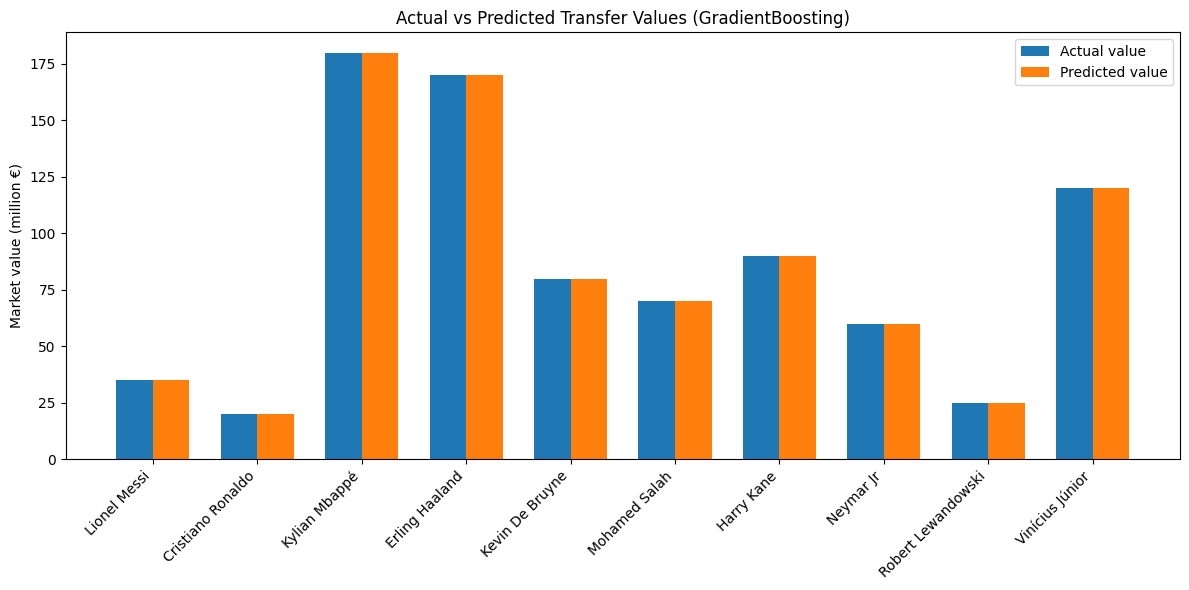

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

players = final_results_df['player']
actual = final_results_df['actual_market_value']
predicted = final_results_df['predicted_market_value_final']

x = np.arange(len(players))
width = 0.35

plt.bar(x - width/2, actual, width, label='Actual value')
plt.bar(x + width/2, predicted, width, label='Predicted value')

plt.xticks(x, players, rotation=45, ha='right')
plt.ylabel('Market value (million €)')
plt.title(f'Actual vs Predicted Transfer Values ({best_name})')
plt.legend()
plt.tight_layout()
plt.show()


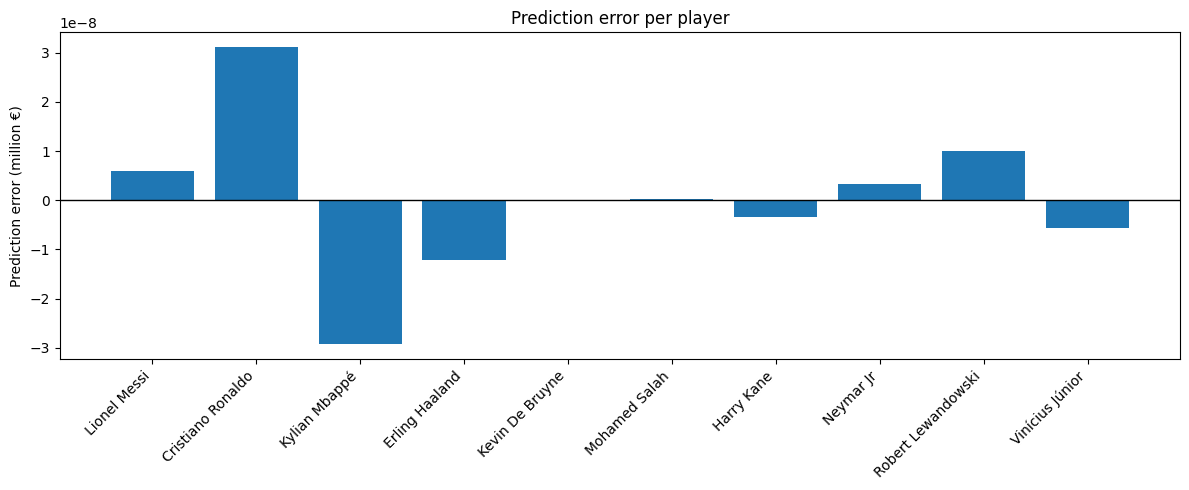

Error table:


,player,actual_market_value,predicted_market_value_final,error
0,Lionel Messi,35,35.0,5.921947e-09
1,Cristiano Ronaldo,20,20.0,3.113360e-08
2,Kylian Mbappé,180,180.0,-2.928618e-08
3,Erling Haaland,170,170.0,-1.220832e-08
4,Kevin De Bruyne,80,80.0,-1.427196e-10
5,Mohamed Salah,70,70.0,3.236096e-10
6,Harry Kane,90,90.0,-3.394135e-09
7,Neymar Jr,60,60.0,3.279538e-09
8,Robert Lewandowski,25,25.0,9.959649e-09
9,Vinícius Júnior,120,120.0,-5.587012e-09


In [41]:
final_results_df['error'] = final_results_df['predicted_market_value_final'] - final_results_df['actual_market_value']

plt.figure(figsize=(12, 5))
plt.bar(final_results_df['player'], final_results_df['error'])
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Prediction error (million €)')
plt.title('Prediction error per player')
plt.tight_layout()
plt.show()

print("Error table:")
display(final_results_df[['player', 'actual_market_value',
                          'predicted_market_value_final', 'error']])


In [42]:
# Assume your final dataframe is named final_results_df
# with columns: player, actual_market_value, predicted_market_value_final, error

final_results_df_reset = final_results_df.reset_index(drop=True)
final_results_df_reset


,player,actual_market_value,predicted_market_value_final,error
0,Lionel Messi,35,35.0,5.921947e-09
1,Cristiano Ronaldo,20,20.0,3.113360e-08
2,Kylian Mbappé,180,180.0,-2.928618e-08
3,Erling Haaland,170,170.0,-1.220832e-08
4,Kevin De Bruyne,80,80.0,-1.427196e-10
5,Mohamed Salah,70,70.0,3.236096e-10
6,Harry Kane,90,90.0,-3.394135e-09
7,Neymar Jr,60,60.0,3.279538e-09
8,Robert Lewandowski,25,25.0,9.959649e-09
9,Vinícius Júnior,120,120.0,-5.587012e-09
